# Background

The Food and Agriculture Organization of the United Nations publishes annual global food production data dating back to 1961. For this analysis, we’d like to do a deep dive into the dataset to understand growth in food production for countries in South America.

We will focus on the following countries, taken from this list on Wikipedia.

- Brazil
- Colombia
- Argentina
- Venezuela
- Peru
- Chile
- Ecuador
- Bolivia
- Paraguay
- Uruguay
- Guyana
- Suriname

# Data

We have one table called global_supply_chain.csv, and it contains food production data from 174 countries for 115 food categories. The dataset spans from 1961 to 2013.


## Data Dictionary

- Area – Country
- Item – Food category
- Y1961, Y1962, … , Y2013 – Food production (in thousands of tons) in that year

# Objectives

1. __Investigate the missing values in the dataset.__ 
    - What is the source of the missing values? 
    - How can we handle them to safely continue with our analysis?
    

2. __Build a new table with the following specifications:__
    - Total food production (across all food categories).
    - Time-series format with years as indices.
    - Contains only data from the 12 South American countries listed above.


3. __Plot the time series for food production in South America and answer the following:__ 
    - From 1961 to 2013, which country saw the largest growth in food production?
    - Are there any signs of competition for food production between South American countries? 


4. __Based on what's been done so far, what other ways can the analysis be improved?__

# Import libraries

In [177]:
# numpy for computation
import numpy as np

# pandas for dataframes
import pandas as pd
pd.set_option('display.max_columns', 100)

# matplotlib for visualization
from matplotlib import pyplot as plt

# seaborn for easy visualization
import seaborn as sns 
sns.set_style('darkgrid')

In [178]:
# csv to dataframe
df = pd.read_csv('global_supply_chain.csv')
print(df.shape)
df.head(3)

(17528, 55)


,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,2045.0,2154.0,1819.0,1963.0,2215.0,2310.0,2335.0,2434.0,2512.0,2282.0,2454.0,2443.0,2129.0,2133.0,2068.0,1994.0,1851.0,1791.0,1683.0,2194.0,1801.0,1754.0,1640.0,1539.0,1582.0,1840.0,1855.0,1853.0,2177.0,2343.0,2407.0,2463.0,2600.0,2668.0,2776.0,3095.0,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),183.0,183.0,182.0,220.0,220.0,195.0,231.0,235.0,238.0,213.0,205.0,233.0,246.0,246.0,255.0,263.0,235.0,254.0,270.0,259.0,248.0,217.0,217.0,197.0,186.0,200.0,193.0,202.0,191.0,199.0,197.0,249.0,218.0,260.0,319.0,254.0,326.0,347.0,270.0,372.0,411.0,448.0,460.0,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,237.0,237.0,237.0,238.0,238.0,237.0,225.0,227.0,230.0,234.0,223.0,219.0,225.0,240.0,244.0,255.0,185.0,203.0,198.0,202.0,189.0,174.0,167.0,160.0,151.0,145.0,145.0,148.0,145.0,135.0,132.0,120.0,155.0,143.0,125.0,138.0,159.0,154.0,141.0,84.0,83.0,122.0,144.0,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89


## 1. Investigate the missing values in the dataset
- _What is the source of the missing values?_
- _How can we handle them to safely continue with our analysis?_

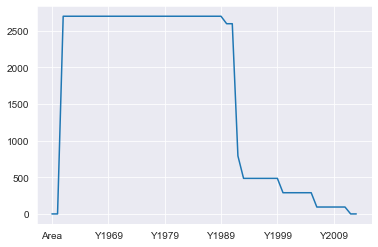

In [179]:
# count missing values
#df.isnull().sum()

# plot
df.isnull().sum().plot()
plt.show()


___Missing values decrease over time.___

### 1.1 What is the source of the missing values?

In [180]:
# check missing values in 2011
df[df.Y2011.isnull()].Area.value_counts()

Sudan    94
Name: Area, dtype: int64

In [181]:
# check missing values in 1999
df[df.Y1999.isnull()].Area.value_counts()

Belgium       101
Serbia         98
Montenegro     97
Luxembourg     95
Sudan          94
Name: Area, dtype: int64

___Serbia and Montenegro did not exist at this time. However Belgium, Luxembourg and Sudan did exist.___

Lets take a closer look at Belgium...

In [182]:
mask = (df.Y1999.isnull()) & (df.Area == 'Belgium')
# drop columns where all values are null
(
    df[mask]
    .dropna(axis=1, how='all')
).head(3)

,Area,Item,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1385,Belgium,Wheat and products,1025.0,1074.0,1078.0,1083.0,1090.0,1089.0,1099.0,1106.0,1143.0,1179.0,1225.0,1245.0,1257,1243
1386,Belgium,Rice (Milled Equivalent),42.0,36.0,48.0,43.0,86.0,86.0,86.0,86.0,85.0,104.0,101.0,93.0,98,96
1387,Belgium,Barley and products,2.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,1.0,1,4


___Belgium may not have been producing these foods before year 2000.___

___So we need to account for 2 scenarios...___
1. _Countries that did not exist_
2. _Countries that did not produce_

### 1.2 How can we handle them to safely continue with our analysis?

For the time-series analysis, it is important to know if the production values are continuous for each country from the year they start. 

In [183]:
# check data is continuous from a starting period for a specific country
# drop columns where there is a missing value in all rows

list(df[(df.Area == 'Luxembourg')].dropna(how='all', axis=1).columns[2:])

['Y2000',
 'Y2001',
 'Y2002',
 'Y2003',
 'Y2004',
 'Y2005',
 'Y2006',
 'Y2007',
 'Y2008',
 'Y2009',
 'Y2010',
 'Y2011',
 'Y2012',
 'Y2013']

In [184]:
# check that data exists for continous years without gaps

def check_years_continuous(data, country):
    
    # get list of years with data
    years = [int(year[1:]) for year in list(data[(data.Area == country)].dropna(how='all', axis=1).columns[2:])]

    # get min and max years
    min_year = min(years)
    max_year = max(years)

    # get number of expected years
    n_years = (max_year - min_year + 1)
    #print(n_years)

    # compare with number of years in list
    continuous_years = n_years == len(years)
    #print(continuous_years)
    
    return country, min_year, continuous_years

In [185]:
check_years_continuous(df, 'Belgium')

('Belgium', 2000, True)

In [186]:
# dictionary to store start years per country
start_year = {}

# get earliest year for each country
for a in df.Area.unique():
    country, min_year, continuous_years = check_years_continuous(df, a)
    start_year[country] = min_year
    
    if continuous_years == False:
        print(country, 'has missing years')



___No alerts confirms that the data is continuous for all countries. The missing values can safely be replaced with zero.___

___We also have a dictionary containing start years which may come in useful later.___

In [187]:
# fill missing values
df.fillna(0, inplace = True)
df[mask].head(3)

,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
1385,Belgium,Wheat and products,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1025.0,1074.0,1078.0,1083.0,1090.0,1089.0,1099.0,1106.0,1143.0,1179.0,1225.0,1245.0,1257,1243
1386,Belgium,Rice (Milled Equivalent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,36.0,48.0,43.0,86.0,86.0,86.0,86.0,85.0,104.0,101.0,93.0,98,96
1387,Belgium,Barley and products,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,2.0,2.0,4.0,2.0,2.0,3.0,2.0,1.0,1,4


## 2. Build a new table with the following specifications 
- Total food production (across all food categories).
- Time-series format with years as indices.
- Contains only data from the 12 South American countries listed above.

### 2.1 Total food production (across all food categories)

In [188]:
# store required columns
cols = list(df.drop('Item', axis=1).columns)

# summarize
df_area_summary = (
    df[cols]
    .groupby('Area')
    .sum()
    .astype(int)
)

df_area_summary.tail(3)

,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,Y1970,Y1971,Y1972,Y1973,Y1974,Y1975,Y1976,Y1977,Y1978,Y1979,Y1980,Y1981,Y1982,Y1983,Y1984,Y1985,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,Y1994,Y1995,Y1996,Y1997,Y1998,Y1999,Y2000,Y2001,Y2002,Y2003,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Yemen,2815,2870,2975,3049,3137,3179,3248,3213,3223,3184,3480,3552,3856,3926,4182,4430,4999,5472,5721,5849,6048,6465,6628,6973,7166,7630,7557,8374,8559,8148,8527,8752,9456,9407,9631,10005,10427,11289,11377,11822,12180,12493,13323,13334,13898,14633,15655,15985,16657,16682,16744,17929,18325
Zambia,2886,2967,2999,3043,3148,3433,3597,3687,3780,3881,4030,4280,4480,4419,4496,4630,4871,4801,4797,4854,4847,4835,4857,4942,4946,5129,5306,5557,5863,6038,6124,6092,6444,6623,6816,6900,6790,6918,7367,6981,7275,7248,7645,7668,7877,8188,8113,8518,8984,9399,9495,9859,10180
Zimbabwe,3080,3287,3289,3368,3442,3591,3762,3937,3968,4190,4376,4551,4564,4919,4873,5102,5073,5206,5159,5508,5555,5594,5629,5787,5865,6028,6109,6351,6550,6623,6527,6595,6656,6771,6672,7128,7308,7538,7358,7447,7864,7640,7749,7944,7819,8289,8315,8243,8718,9063,9464,9661,9524


### 2.2 Time-series format with years as indices

In [189]:
# shape for time-series
df_area_ts = (
    df_area_summary
    .transpose()
)

# edit index label
list_index = [int(col[1:]) for col in df_area_summary.columns]
df_area_ts.index = list_index

df_area_ts.tail(3)

Area,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,"China, Hong Kong SAR","China, Macao SAR","China, Taiwan Province of","China, mainland",Colombia,Congo,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Côte d'Ivoire,Democratic People's Republic of Korea,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,...,Poland,Portugal,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Samoa,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Sierra Leone,Slovakia,Slovenia,Solomon Islands,South Africa,Spain,Sri Lanka,Sudan,Suriname,Swaziland,Sweden,Switzerland,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
2011,19908,6780,58375,27455,118,63810,5315,42294,17739,15148,573,110212,396,18366,21641,411,11384,85,10591,6822,2009,327899,471,9830,17490,627,11525,28153,67747,4669,7538,23015,11105,747,30161,2378139,58908,4886,6317,7410,18152,1564,18420,25922,22591,11485,667,138,12692,18209,...,71609,21936,77431,4826,44153,254777,17334,51,215,157,308,232,33044,9920,14039,5725,7993,3770,725,58227,82344,19339,0,585,1153,19202,15931,7285,75513,3396,777,5814,1695,17446,137800,6995,39639,82036,11507,122449,52692,625116,5269,42863,354,42109,91214,16744,9495,9464
2012,21184,6909,60816,27968,113,64614,5787,42861,17834,15527,635,111573,403,18539,21566,433,11996,84,10794,6581,2168,315024,498,9923,18257,643,11970,29335,67319,4752,8060,24030,11738,726,29903,2454912,61967,4874,6489,7198,18407,1493,18329,26606,22753,11179,702,138,13702,18007,...,71447,21932,75478,4562,42973,256646,18303,54,214,155,330,235,35238,10627,13313,5965,7209,3710,718,59341,81508,19633,41649,599,1186,19393,15848,8087,78577,3421,818,6100,1774,17954,143829,7034,40297,81220,11863,121837,51971,643044,5507,45499,362,40549,103344,17929,9859,9661
2013,21471,6952,63455,30121,119,65063,5862,43975,18167,15928,627,114184,407,17445,22268,424,12473,103,11027,6994,2224,312488,530,10224,18890,651,12421,30520,67893,4185,8194,24642,11557,739,30220,2499252,64621,5168,6642,7404,18823,1454,18524,27057,22848,11589,791,138,14399,17149,...,70616,21604,77125,4643,43598,253892,18547,56,216,158,329,251,35912,10653,14236,6144,7709,3700,727,59621,81051,20550,42997,632,1269,19719,15983,8543,78567,3482,837,6379,1773,18479,145101,7082,40247,79580,13095,122946,54968,641776,5316,47311,370,39706,105399,18325,10180,9524


### 2.3 Contains only data from the 12 South American countries

In [190]:
sa_countries = ['Brazil', 'Colombia', 'Argentina', 'Venezuela', 
                'Peru', 'Chile', 'Ecuador', 'Bolivia', 'Paraguay',
                'Uruguay', 'Guyana', 'Suriname']

for c in sa_countries:
    if c not in df_area_ts.columns:
        print(c, 'not in columns')
        

Venezuela not in columns
Bolivia not in columns


Check Venezuela and Bolivia column names

In [191]:
mask = (df_area_ts.columns.str.contains('Venez')) | (df_area_ts.columns.str.contains('Boli'))
df_area_ts.columns[mask]

Index(['Bolivia (Plurinational State of)', 'Venezuela (Bolivarian Republic of)'], dtype='object', name='Area')

Rename these countries in list.

Create new dataframe.

In [192]:
sa_countries = ['Brazil', 'Colombia', 'Argentina', 'Venezuela (Bolivarian Republic of)', 
                'Peru', 'Chile', 'Ecuador', 'Bolivia (Plurinational State of)', 'Paraguay',
                'Uruguay', 'Guyana', 'Suriname']

# new south america time-series dataframe
df_s_america_ts = df_area_ts.copy()[sa_countries]
df_s_america_ts.head(3)

Area,Brazil,Colombia,Argentina,Venezuela (Bolivarian Republic of),Peru,Chile,Ecuador,Bolivia (Plurinational State of),Paraguay,Uruguay,Guyana,Suriname
1961,71616,16433,33850,9163,10089,9687,6038,3045,2633,3656,509,208
1962,76420,17518,33231,9078,10589,9946,6442,3159,2712,3478,520,219
1963,79684,17215,33692,9467,10460,10553,6516,3377,2850,3678,516,238


## 3. Plot the time series for food production in South America and answer the following:
- From 1961 to 2013, which country saw the largest growth in food production?
- Are there any signs of competition for food production between South American countries?

### 3.1 From 1961 to 2013, which country saw the largest growth in food production?

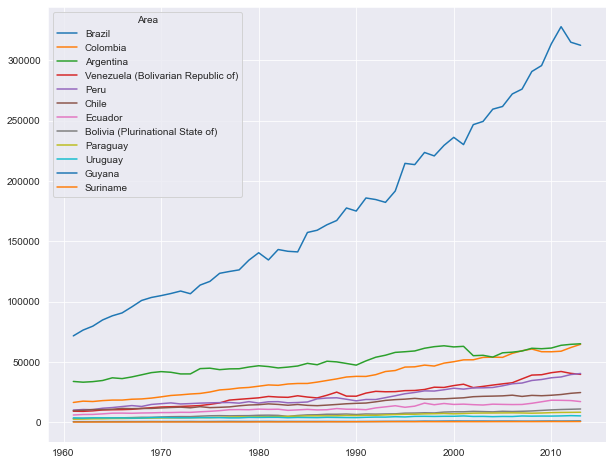

In [193]:
# plot
df_s_america_ts.plot(figsize=(10,8))
plt.show()

___At first glance, Brazil appears to show the biggest growth.___

Next, will examine excluding Brazil to take a closer look at the other countries

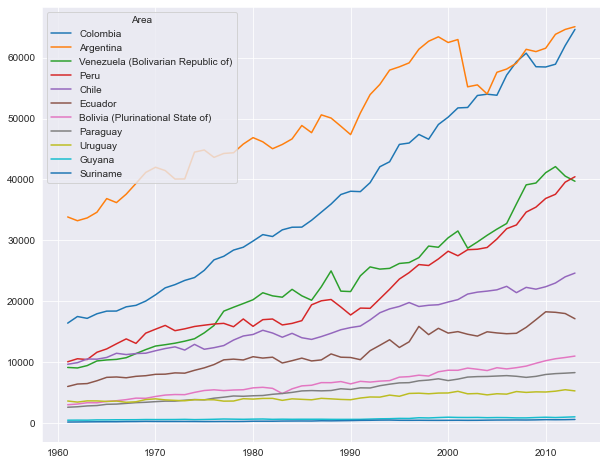

In [194]:
# plot excluding Brazil
(
    df_s_america_ts.drop('Brazil', axis=1)
    .plot(figsize=(10,8))
)
plt.show()

___Other countries show significant year-on-year growth.___

Lets calculate these values

In [195]:
# new dataframe year-on-year percent
df_sa_yoy = (df_s_america_ts - df_s_america_ts.shift()) / df_s_america_ts.shift()
df_sa_yoy.tail(3)

Area,Brazil,Colombia,Argentina,Venezuela (Bolivarian Republic of),Peru,Chile,Ecuador,Bolivia (Plurinational State of),Paraguay,Uruguay,Guyana,Suriname
2011,0.045326,0.007801,0.036988,0.024226,0.018543,0.027226,-0.004483,0.031357,0.017355,0.026295,-0.050150,-0.026622
2012,-0.039265,0.051928,0.012600,-0.037047,0.052940,0.044102,-0.011093,0.019167,0.009205,0.045170,0.059134,0.023932
2013,-0.008050,0.042829,0.006949,-0.020790,0.022422,0.025468,-0.047648,0.021586,0.011310,-0.034683,0.058824,0.055092


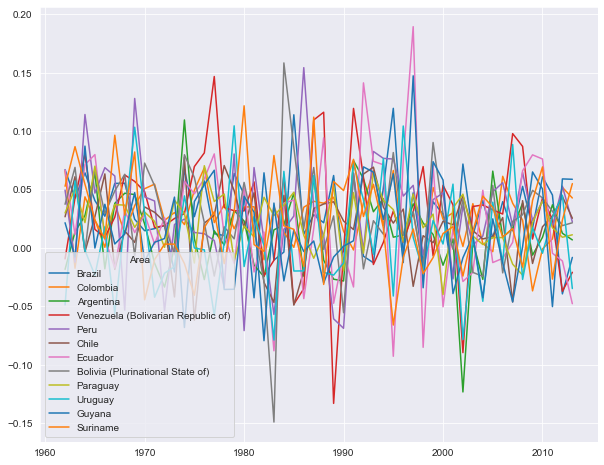

In [196]:
# plot year-on-year growth
df_sa_yoy.plot(figsize=(10, 8))
plt.show()

___To noisey to interperate anything from this plot.___

Lets try a rolling average to smooth out the variance.

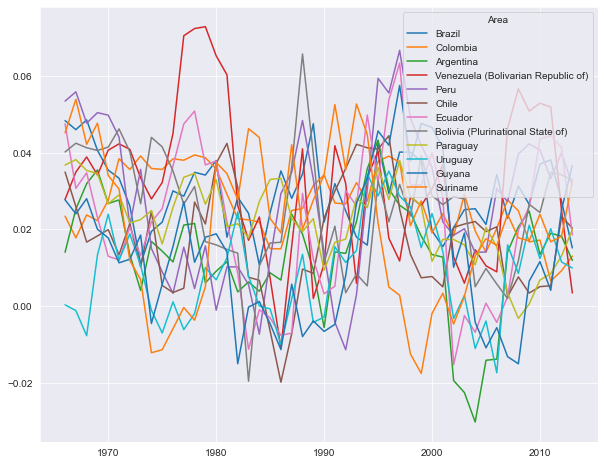

In [197]:
# plot rolling average 
df_sa_yoy.rolling(window=5).mean().plot(figsize=(10, 8))
plt.show()

___Still too noisey.___

Lets look at the average year-on-year growth.

In [198]:
# average growth
df_sa_yoy.mean().sort_values(ascending=False)

Area
Venezuela (Bolivarian Republic of)    0.029828
Brazil                                0.029309
Peru                                  0.028159
Colombia                              0.026952
Bolivia (Plurinational State of)      0.026077
Paraguay                              0.022642
Suriname                              0.022377
Ecuador                               0.021750
Chile                                 0.018638
Guyana                                0.015178
Argentina                             0.013286
Uruguay                               0.008234
dtype: float64

___Venezuela has potentially grown more than Brazil.___

Lets also look at this from the perspective of overall growth.

In [199]:
# overall growth
(
    (df_s_america_ts.loc[2013] - df_s_america_ts.loc[1961]) / df_s_america_ts.loc[1961]
).sort_values(ascending=False)

Area
Brazil                                3.363382
Venezuela (Bolivarian Republic of)    3.333297
Peru                                  3.009020
Colombia                              2.932392
Bolivia (Plurinational State of)      2.621346
Paraguay                              2.158374
Suriname                              2.038462
Ecuador                               1.840179
Chile                                 1.543822
Guyana                                1.086444
Argentina                             0.922097
Uruguay                               0.454048
dtype: float64

___In terms of overall growth, Brazil just edges it.___

### 3.2 Are there any signs of competition for food production between South American countries?

Correlations between countries countries can be useful to answer this question.

In [200]:
# correlations absolute values
corr_abs_production = df_s_america_ts.corr()

# correlations year-on-year growth
corr_yoy_growth = df_sa_yoy.corr()

# correlations year-on-year growth rolling
corr_yoy_growth_rolling = df_sa_yoy.rolling(window=6).mean().corr()

In [201]:
def plot_corr_heatmap(corr):
    plt.figure(figsize=(10, 8))

    # Make to cover top triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    # Plot heatmap
    sns.heatmap(corr,
                vmin=-1.0,
                vmax=1.0,
                mask=mask,
                cmap='RdBu',
                annot=True)
    plt.show()

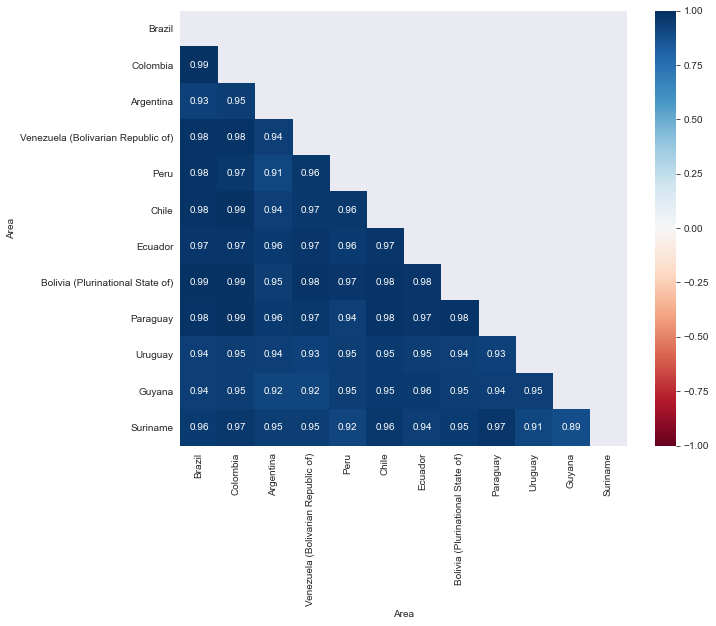

In [202]:
plot_corr_heatmap(corr_abs_production)

___High correrations in absolute values across all countries could be attributed to general economic growth across the region.___

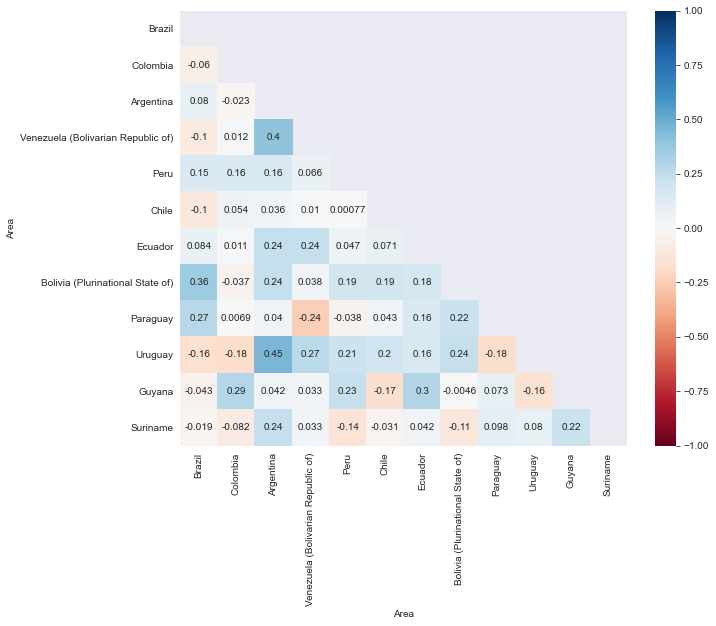

In [203]:
plot_corr_heatmap(corr_yoy_growth)

___Year-on-year correlations indicate competition between Paraguay and Venezuela.___

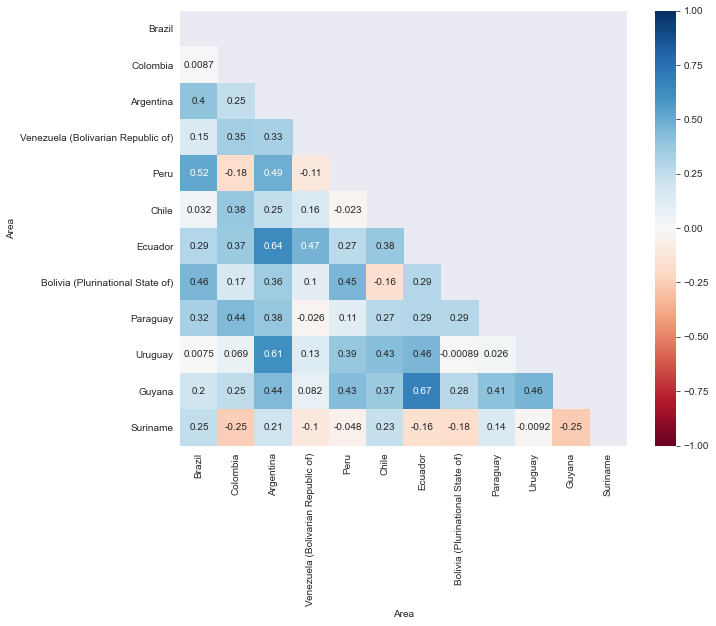

In [204]:
plot_corr_heatmap(corr_yoy_growth_rolling)

___Year-on-year 6 month rolling correlations indicate some competition between Suriname and Columbia, as well as Suriname and Guyana.___

___This is indicated by the negative coefficients.___

## 4. What other ways can the analysis be improved?

- __Granularity__: Break down the data into individual food categories. Then, systematically re-run the analysis for each food category to understand what's going on at a deeper level.
- __Scope__: Expand analysis to additional countries (especially when looking at correlations and signs of possible competition). This would be especially useful when combined with improved granularity.
- __External Data__: Layer in macro-economic indicators such as GDP growth, education access, unemployment rates, etc. 